# Temperature Forecast Project

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

There are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/temprature.csv")
pd.pandas.set_option('display.max_columns',28)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
#checking dimension
df.shape

(7752, 25)

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Almost all columns are integer value except Date columns

# Checking Null values

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

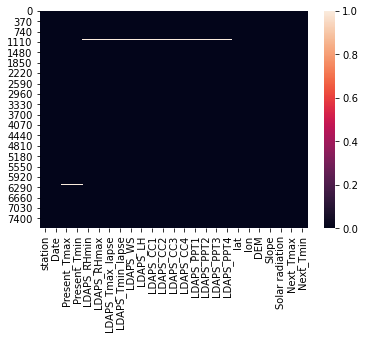

In [7]:
sns.heatmap(df.isnull())

Checking rows with null values

In [8]:
is_NaN = df. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
225       1.0  09-07-2013           NaN           NaN    70.051193   
271      22.0  10-07-2013           NaN           NaN    72.196007   
300       1.0  12-07-2013           NaN           NaN    95.027298   
450       1.0  18-07-2013           NaN           NaN    60.891193   
464      15.0  18-07-2013           NaN           NaN    52.795406   
...       ...         ...           ...           ...          ...   
7629      5.0  26-08-2017           NaN           NaN    43.755058   
7682      8.0  28-08-2017          26.3          18.1    29.959215   
7707      8.0  29-08-2017           NaN           NaN    44.392651   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
225     99.668961         27.872808         22.907420  11.017837   44.002020   

In [9]:
df=df.dropna()
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [10]:
#statistical analysis
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Divide Date column to date,month and year column

In [11]:
df['date']=df['Date'].apply(lambda x:int(x.split('-')[0]))

<ipython-input-11-b1f80fe61442>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['Date'].apply(lambda x:int(x.split('-')[0]))


In [12]:
df['month']=df['Date'].apply(lambda x:int(x.split('-')[1]))

<ipython-input-12-169a1ddf44ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['Date'].apply(lambda x:int(x.split('-')[1]))


In [13]:
df['year']=df['Date'].apply(lambda x:int(x.split('-')[-1]))

<ipython-input-13-8852b615d2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['Date'].apply(lambda x:int(x.split('-')[-1]))


Now we may drop Date column

In [14]:
df=df.drop('Date',axis=1)

In [15]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [16]:
df['month'].unique()

array([6, 7, 8], dtype=int64)

In [17]:
df['date'].unique()

array([30,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31],
      dtype=int64)

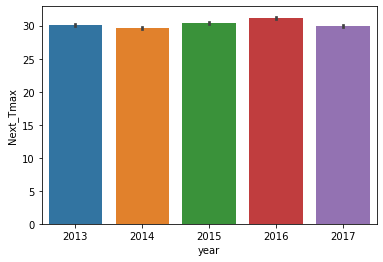

In [18]:
sns.barplot(x='year',y='Next_Tmax',data=df)

In 2016 temprature is high from 5 consecutive years

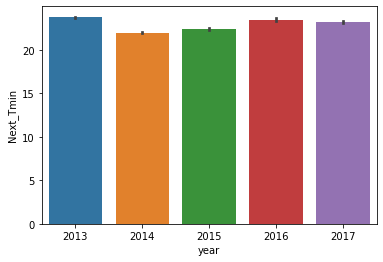

In [19]:
sns.barplot(x='year',y='Next_Tmin',data=df)

In 2014 temprature is minimum by years.

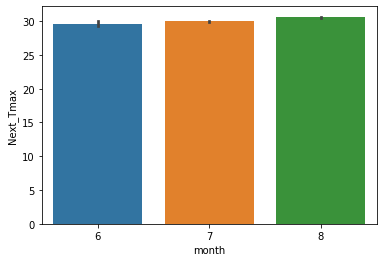

In [20]:
sns.barplot(x='month',y='Next_Tmax',data=df)

In Above 5 years 6,7,8 months have maximum temprature in range 28.5 to 30.5 degree celcius

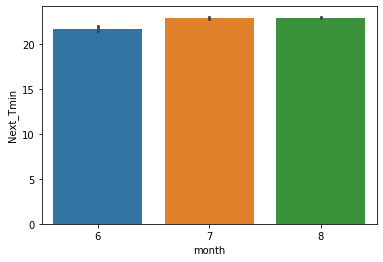

In [21]:
sns.barplot(x='month',y='Next_Tmin',data=df)

In 6th month minimum temprature is low

# Checking Corelation

In [22]:
df.corr()['Next_Tmax'].sort_values()

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
date               -0.127060
LDAPS_PPT1         -0.125954
Slope              -0.104279
lat                -0.055367
lon                 0.003502
Solar radiation     0.016145
year                0.061211
month               0.096811
station             0.107747
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

LDAPS_Tmax_lapse    is highly  positive corelated with Next_Tmax followed by Next_Tmin,Present_Tmax,LDAPS_Tmin_lapse and Present_Tmin.
LDAPS_CC3  is highly negative corelated with Next_Tmax followed by LDAPS_CC2,LDAPS_CC1,LDAPS_CC4 and LDAPS_RHmin.


In [23]:
df.corr()['Next_Tmin'].sort_values()

DEM                -0.249303
Slope              -0.148379
date               -0.134284
LDAPS_PPT4         -0.114900
LDAPS_WS           -0.102021
LDAPS_CC4          -0.086197
lat                -0.085136
LDAPS_RHmax        -0.076415
LDAPS_PPT3         -0.068664
LDAPS_LH           -0.060392
LDAPS_CC3          -0.056490
lon                -0.045758
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.012462
LDAPS_PPT1          0.018031
year                0.021617
LDAPS_CC2           0.030358
month               0.030379
LDAPS_RHmin         0.093249
Solar radiation     0.125517
station             0.128184
LDAPS_Tmax_lapse    0.589963
Next_Tmax           0.616629
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_Tmin_lapse    0.886513
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

Dem is highly  negatively corelated with Next_Tmin.
LDAPS_Tmin_lapse is highly positively corelated with Next_Tmin followed by LDAPS_Tmax_lapse,Present_Tmin,Present_Tmax  and Next_Tmax.

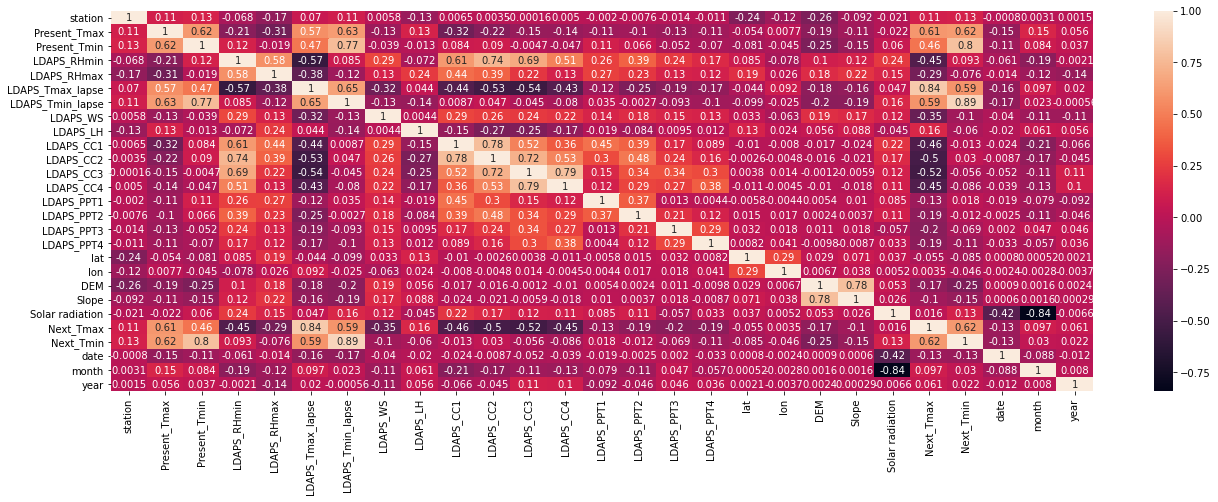

In [24]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# checking outlier

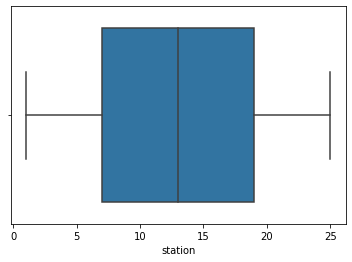

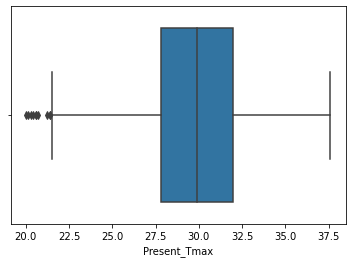

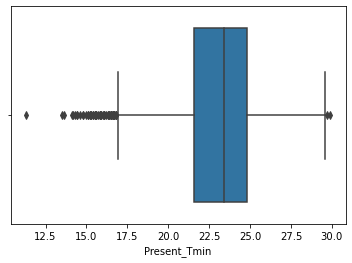

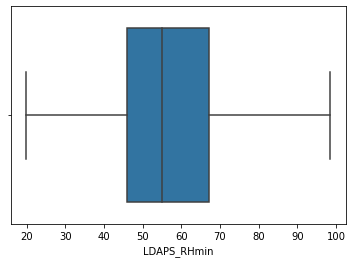

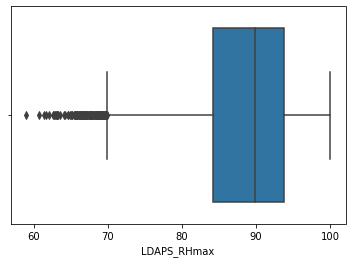

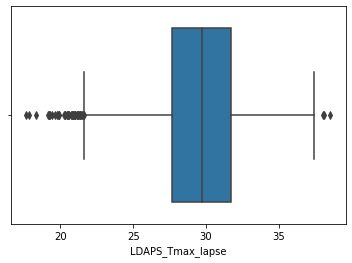

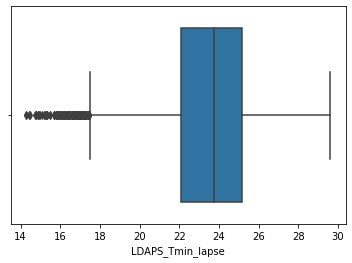

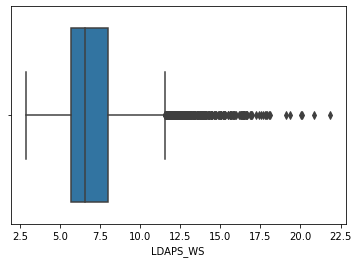

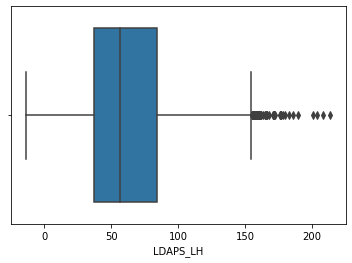

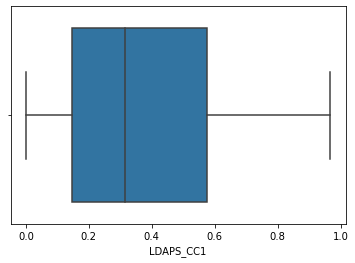

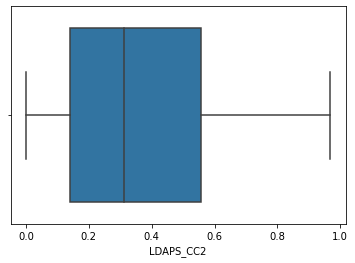

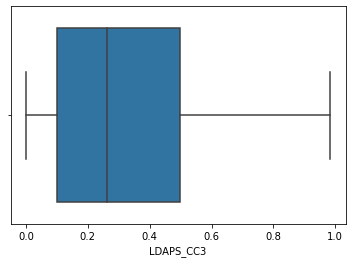

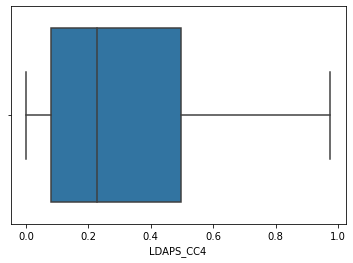

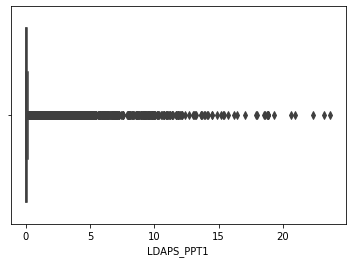

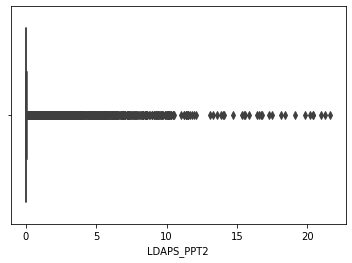

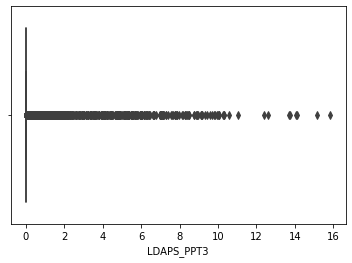

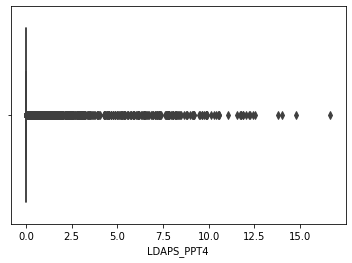

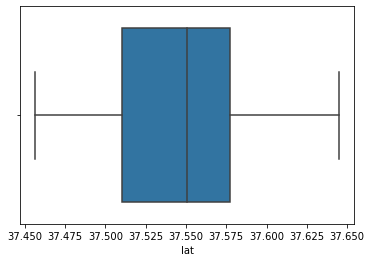

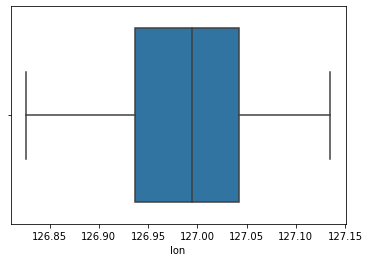

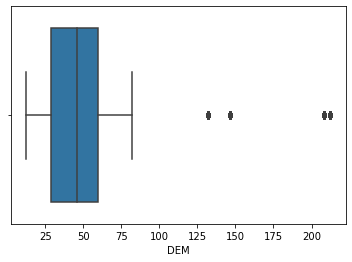

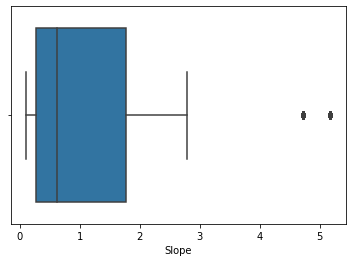

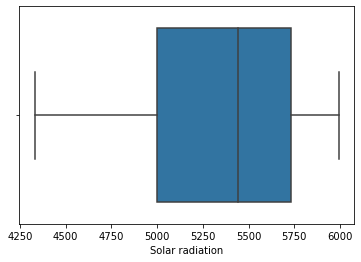

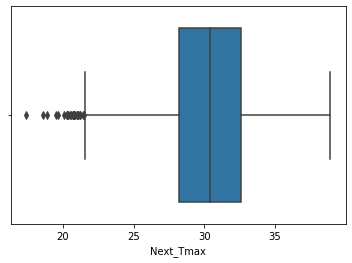

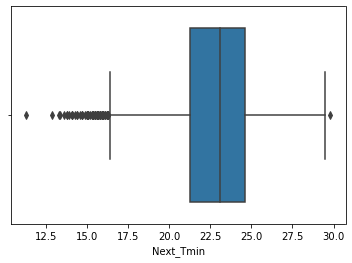

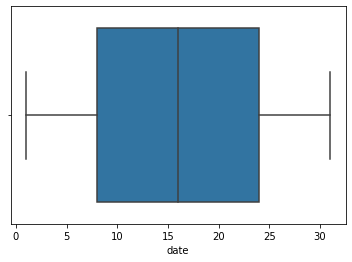

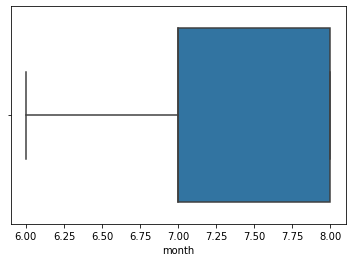

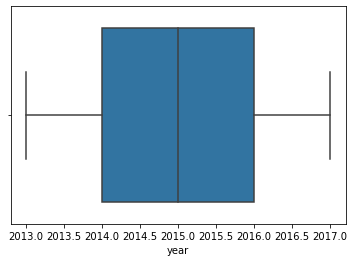

In [25]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

Due to std is less so no outlier is present

# Checking Skewness

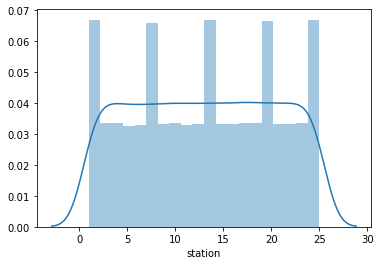

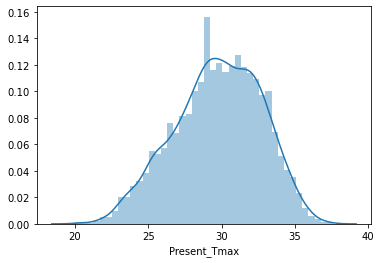

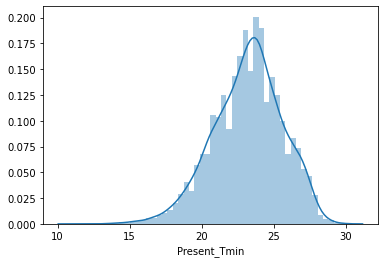

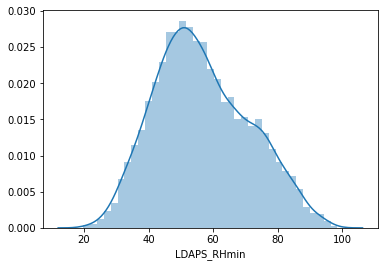

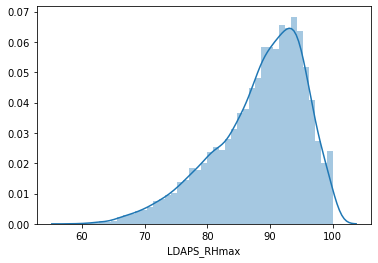

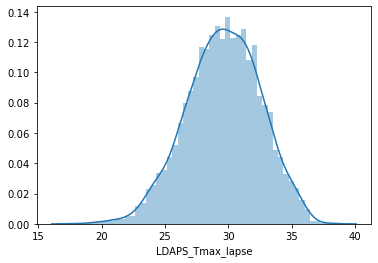

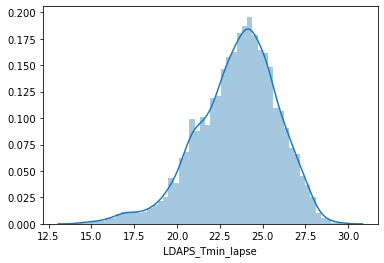

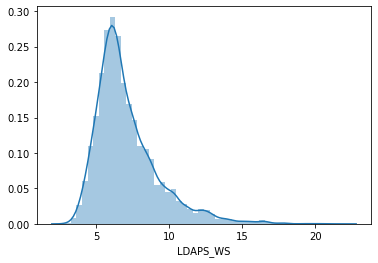

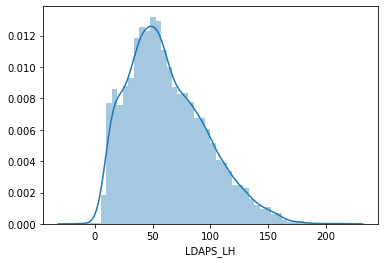

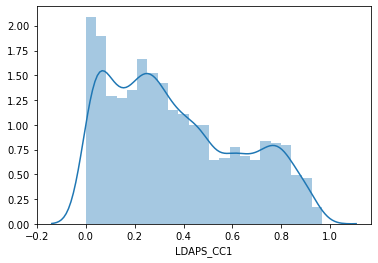

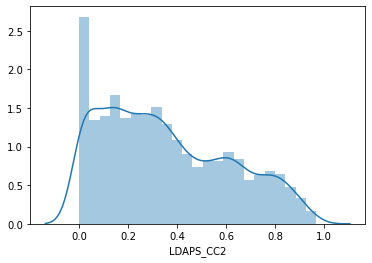

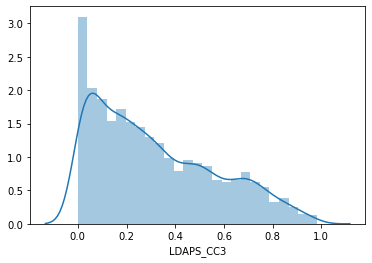

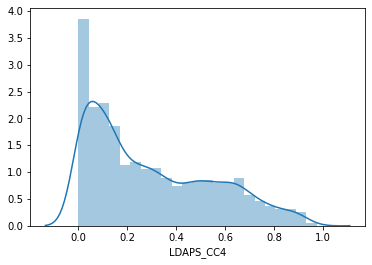

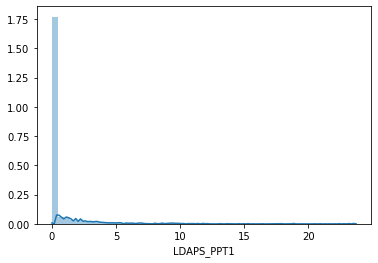

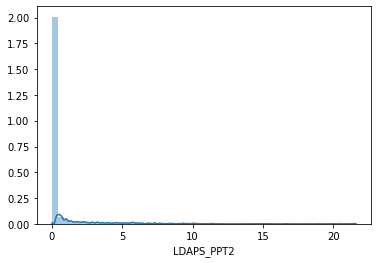

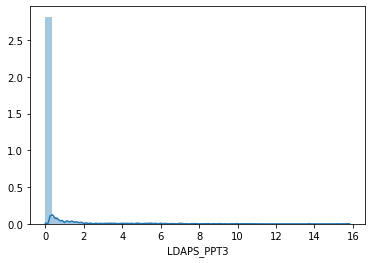

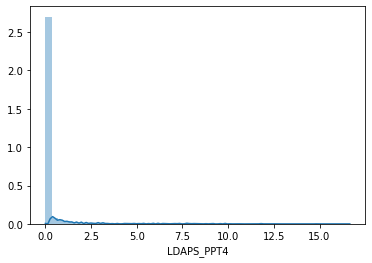

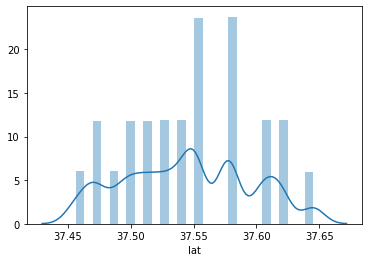

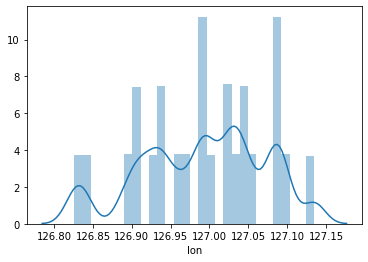

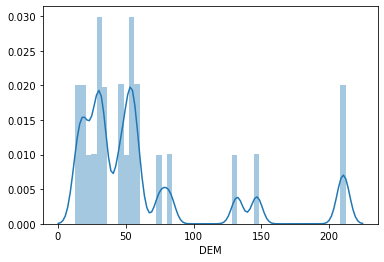

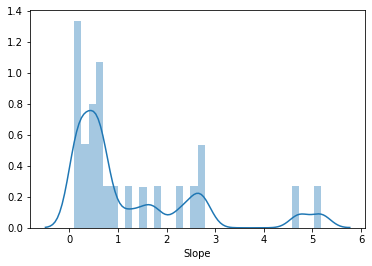

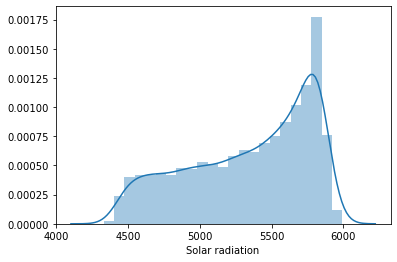

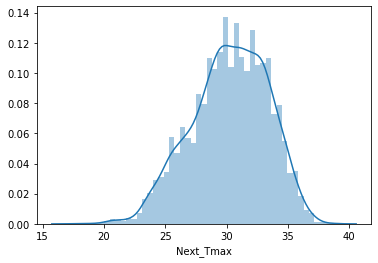

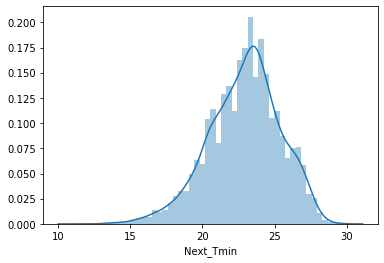

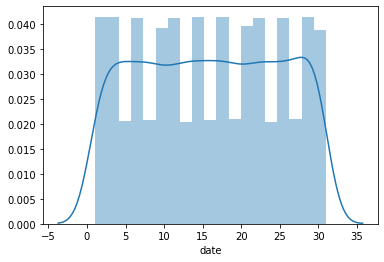

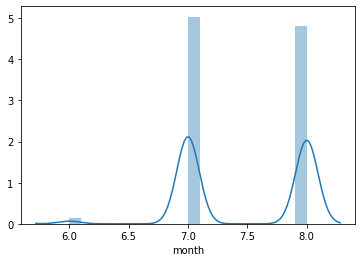

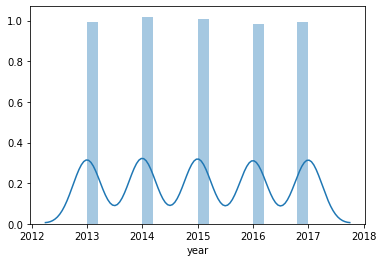

In [26]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [27]:
df.skew().sort_values()

LDAPS_RHmax        -0.845264
LDAPS_Tmin_lapse   -0.574035
Solar radiation    -0.524325
Next_Tmin          -0.393662
Present_Tmin       -0.353822
Next_Tmax          -0.334842
lon                -0.289048
Present_Tmax       -0.257069
LDAPS_Tmax_lapse   -0.222349
month              -0.174856
date               -0.010718
station            -0.004178
year                0.013575
lat                 0.085377
LDAPS_RHmin         0.301396
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_LH            0.662971
LDAPS_CC4           0.663815
LDAPS_WS            1.553926
Slope               1.559050
DEM                 1.721617
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
dtype: float64

Some columns have skewness present so we remove it by using power_transform method

In [28]:
from sklearn.preprocessing import power_transform

In [29]:
df['LDAPS_PPT1']=power_transform(df[['LDAPS_PPT1']])

In [30]:
df['LDAPS_PPT2']=power_transform(df[['LDAPS_PPT2']])

In [31]:
df['LDAPS_PPT3']=power_transform(df[['LDAPS_PPT3']])

In [32]:
df['LDAPS_PPT4']=power_transform(df[['LDAPS_PPT4']])

In [33]:
df['LDAPS_RHmax']=power_transform(df[['LDAPS_RHmax']])

skewness has been removed

Divide dataset in independent and dependent variable

# Create model for Next_Tmax

In [34]:
x=df.drop('Next_Tmax',axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,date,month,year
0,1.0,28.7,21.4,58.255688,0.271501,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,-0.560421,-0.521172,-0.4944,-0.447011,37.6046,126.991,212.3350,2.7850,5992.895996,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,0.184890,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,-0.560421,-0.521172,-0.4944,-0.447011,37.6046,127.032,44.7624,0.5141,5869.312500,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.769141,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,-0.560421,-0.521172,-0.4944,-0.447011,37.5776,127.058,33.3068,0.2661,5863.555664,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,1.309753,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,-0.560421,-0.521172,-0.4944,-0.447011,37.6450,127.022,45.7160,2.5348,5856.964844,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,0.110434,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,-0.560421,-0.521172,-0.4944,-0.447011,37.5507,127.135,35.0380,0.5055,5859.552246,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,-1.375942,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,-0.560421,-0.521172,-0.4944,-0.447011,37.5507,127.040,26.2980,0.5721,4456.024414,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,-0.803558,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,-0.560421,-0.521172,-0.4944,-0.447011,37.5102,127.086,21.9668,0.1332,4441.803711,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,-1.319444,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,-0.560421,-0.521172,-0.4944,-0.447011,37.5372,126.891,15.5876,0.1554,4443.313965,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,-1.462026,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,-0.560421,-0.521172,-0.4944,-0.447011,37.5237,126.909,17.2956,0.2223,4438.373535,18.8,30,8,2017


In [35]:
y=df['Next_Tmax']
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7588, dtype: float64

Choosing best random_state

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [37]:
maxacc=0
maxrs=0
for i in range(2,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score of',maxacc,'on random state',maxrs)

best accuracy score of 0.8272141782710645 on random state 30


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [39]:
x_test

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,date,month,year
5803,4.0,33.5,25.9,64.590057,1.077107,30.125693,24.583373,5.709080,85.651274,0.385612,0.209931,0.468099,0.020910,-0.170198,2.267095,2.554301,-0.447011,37.6450,127.022,45.7160,2.5348,4960.184570,26.3,15,8,2016
3046,22.0,30.6,20.3,47.387127,-0.441421,28.762432,21.429283,4.633191,76.497400,0.074606,0.144082,0.199264,0.199610,-0.560421,-0.521172,-0.494400,-0.345470,37.5102,127.086,21.9668,0.1332,4520.791504,21.1,28,8,2014
5908,9.0,32.3,27.1,56.227974,-0.735530,31.364678,25.887891,6.001063,96.828248,0.584036,0.357118,0.373853,0.548897,-0.380006,-0.521172,-0.494400,-0.447011,37.4967,126.826,50.9312,0.4125,4846.185547,27.6,19,8,2016
5677,3.0,34.4,26.9,41.479034,-1.217727,36.548366,27.846025,5.715089,16.528445,0.079948,0.206413,0.096402,0.033345,-0.560421,-0.514246,-0.466904,-0.447011,37.5776,127.058,33.3068,0.2661,5127.352051,26.0,10,8,2016
1192,18.0,33.6,27.0,53.324955,-0.087744,31.473373,26.407081,7.664436,98.018736,0.467491,0.317528,0.041847,0.018555,-0.321663,-0.521172,-0.494400,-0.447011,37.4832,127.024,56.4448,1.2313,4953.190918,27.1,16,8,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,21.0,24.7,23.5,91.126266,1.056464,25.843409,23.270765,6.174057,32.577737,0.890305,0.947379,0.905626,0.935493,2.188492,2.373783,2.474410,0.469448,37.5507,127.040,26.2980,0.5721,5756.556641,22.5,12,7,2013
437,13.0,26.6,24.1,71.382408,0.367152,27.208787,24.759125,5.227693,25.316448,0.631318,0.649179,0.589653,0.448362,1.153156,0.279194,-0.494400,-0.447011,37.5776,127.083,59.8324,2.6865,5686.350098,23.9,17,7,2013
2578,4.0,26.0,20.7,60.215191,1.255695,26.984258,18.634665,6.131082,108.864598,0.053030,0.001379,0.011487,0.045986,-0.560421,-0.521172,-0.494400,-0.447011,37.6450,127.022,45.7160,2.5348,5148.043945,18.5,10,8,2014
617,18.0,28.1,24.1,58.495960,0.202968,28.378322,22.793561,7.258500,101.045011,0.241185,0.184779,0.038845,0.130183,-0.560421,-0.521172,-0.494400,-0.447011,37.4832,127.024,56.4448,1.2313,5567.336914,23.1,24,7,2013


In [40]:
y_test

5803    36.1
3046    30.5
5908    35.1
5677    37.0
1192    33.9
        ... 
320     25.4
437     26.6
2578    28.3
617     31.6
2043    32.6
Name: Next_Tmax, Length: 1518, dtype: float64

In [41]:
x_train.shape

(6070, 26)

In [42]:
y_train.shape

(6070,)

# Create model to predict Next_Tmax

In [43]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [44]:
ls=Lasso()
svr=SVR()
rd=Ridge()
els=ElasticNet()
ex=XGBRegressor()

In [45]:
model=[lr,ls,rd,els,ex,svr]

In [48]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print('r2_score is',r2_score(y_test,y_pred))
    print('mean_squared_error is',mean_squared_error(y_test,y_pred))
    print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

LinearRegression()
r2_score is 0.8272141782710645
mean_squared_error is 1.7061790518475402
mean_absolute_error is 1.0087198149914007
Lasso()
r2_score is 0.756991547277297
mean_squared_error is 2.399594638660827
mean_absolute_error is 1.218249449195912
Ridge()
r2_score is 0.8271269347551704
mean_squared_error is 1.707040540699684
mean_absolute_error is 1.0088361590517867
ElasticNet()
r2_score is 0.7758848852401694
mean_squared_error is 2.213031776446939
mean_absolute_error is 1.1654217774014743
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,


# Using Ensemble Algorithm

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_Pred=rf.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.04906308062687048
mean_squared_error is 9.390056633281967
mean_absolute_error is 2.449885749607133


In [54]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_Pred=ext.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.04906308062687048
mean_squared_error is 9.390056633281967
mean_absolute_error is 2.449885749607133


In [59]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_Pred=gb.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.04906308062687048
mean_squared_error is 9.390056633281967
mean_absolute_error is 2.449885749607133


In [56]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
y_Pred=ad.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.04906308062687048
mean_squared_error is 9.390056633281967
mean_absolute_error is 2.449885749607133


checking overfitting of models  by using cross_val_score

In [57]:
from sklearn.model_selection import cross_val_score

finding best cv

In [58]:
for i in range(2,10):
    cvscore=cross_val_score(ex,x,y,cv=i)
    print('best accuracy is',cvscore.mean(),'for',i)

best accuracy is 0.6611064155849173 for 2
best accuracy is 0.7129526679525897 for 3
best accuracy is 0.7112052917484032 for 4
best accuracy is 0.7087854244218861 for 5
best accuracy is 0.6976127493179568 for 6
best accuracy is 0.7106816501246712 for 7
best accuracy is 0.696066161108413 for 8
best accuracy is 0.6490601115310122 for 9


In [60]:
cv=3

In [61]:
model=[lr,ls,rf,rd,els,ext,ex,ad,gb,svr]

In [63]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=3)
    print('cross_val_score of',i,'is',cvscore.mean())

cross_val_score of LinearRegression() is 0.7005225768088869
cross_val_score of Lasso() is 0.6910797491809065
cross_val_score of RandomForestRegressor() is 0.7123757706315602
cross_val_score of Ridge() is 0.7014762046727449
cross_val_score of ElasticNet() is 0.7177354676757668
cross_val_score of ExtraTreesRegressor() is 0.7230910753330884
cross_val_score of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) is 0.7129526679525897
cross_val_score of AdaBoostRegressor() is 0.6

ExtraTreesRegressor is the best model

# HyperParameter Tuning of model

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid= {'criterion': ['mse', 'mae'],'max_features': ['auto','sqrt','log2']}

In [66]:
gscv = GridSearchCV(ex,param_grid,cv=5,n_jobs=5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:   44.2s finished


[15:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [67]:
gscv.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [68]:
gscv.best_score_

0.9273347649137396

In [69]:
gscv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, criterion='mse', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features='auto', min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, criterion='mse', gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features='auto', min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('r2_score is:',r2_score(y_test,y_pred))
print('root mean_squared_error is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mean_absolute_error is:',mean_absolute_error(y_test,y_pred))

[15:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


r2_score is: 0.9437113953246421
root mean_squared_error is: 0.7455357831840017
mean_absolute_error is: 0.5863285509493982


# Saving model for Next_Tmax

In [122]:
import joblib
joblib.dump(model,'next_tmin.obj')

['next_tmin.obj']

# Create model for predict Next_Tmin

In [109]:
x=df.drop('Next_Tmin',axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,date,month,year
0,1.0,28.7,21.4,58.255688,0.271501,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,-0.560421,-0.521172,-0.4944,-0.447011,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,30,6,2013
1,2.0,31.9,21.6,52.263397,0.184890,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,-0.560421,-0.521172,-0.4944,-0.447011,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.769141,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,-0.560421,-0.521172,-0.4944,-0.447011,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,30,6,2013
3,4.0,32.0,23.4,58.239788,1.309753,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,-0.560421,-0.521172,-0.4944,-0.447011,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,30,6,2013
4,5.0,31.4,21.9,56.174095,0.110434,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,-0.560421,-0.521172,-0.4944,-0.447011,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,-1.375942,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,-0.560421,-0.521172,-0.4944,-0.447011,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,30,8,2017
7746,22.0,22.5,17.4,30.094858,-0.803558,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,-0.560421,-0.521172,-0.4944,-0.447011,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,30,8,2017
7747,23.0,23.3,17.1,26.741310,-1.319444,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,-0.560421,-0.521172,-0.4944,-0.447011,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,30,8,2017
7748,24.0,23.3,17.7,24.040634,-1.462026,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,-0.560421,-0.521172,-0.4944,-0.447011,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,30,8,2017


In [110]:
y=df['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7588, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

Finding best random_state

In [112]:
maxrs=0
maxacc=0
for i in range(1,40):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    y1_pred=lr.predict(x1_test)
    acc=r2_score(y1_test,y1_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy score is',maxacc,'on random_state',maxrs)

best accuracy score is 0.8633836303244491 on random_state 29


In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [115]:
ls=Lasso()
rf=RandomForestRegressor()
svr=SVR()
rd=Ridge()
els=ElasticNet()
ex=XGBRegressor()

In [116]:
model=[lr,ls,svr,rd,els,ex]

In [117]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print('r2_score is',r2_score(y_test,y_pred))
    print('mean_squared_error is',mean_squared_error(y_test,y_pred))
    print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

LinearRegression()
r2_score is 0.8633836303244491
mean_squared_error is 0.8559543587643896
mean_absolute_error is 0.7357563974333073
Lasso()
r2_score is 0.8102363955866729
mean_squared_error is 1.1889423260051486
mean_absolute_error is 0.8780163603313733
SVR()
r2_score is 0.1298210133854235
mean_squared_error is 5.452007678631962
mean_absolute_error is 1.8491499624832157
Ridge()
r2_score is 0.8633737811106601
mean_squared_error is 0.8560160678955367
mean_absolute_error is 0.7359127642604528
ElasticNet()
r2_score is 0.8330799176615151
mean_squared_error is 1.0458188310980003
mean_absolute_error is 0.8262223952631101
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1

# Using Ensemble technique

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_Pred=rf.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.9445728885126868
mean_squared_error is 0.3472722762576523
mean_absolute_error is 0.44938259702740285


In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_Pred=gb.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.9445728885126868
mean_squared_error is 0.3472722762576523
mean_absolute_error is 0.44938259702740285


In [120]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_Pred=ext.predict(x_test)
print('r2_score is',r2_score(y_test,y_pred))
print('mean_squared_error is',mean_squared_error(y_test,y_pred))
print('mean_absolute_error is',mean_absolute_error(y_test,y_pred))

r2_score is 0.9445728885126868
mean_squared_error is 0.3472722762576523
mean_absolute_error is 0.44938259702740285


Finding cv and cvscore for overfitting issue

In [85]:
for j in range(2,10):
    cv=cross_val_score(ex,x,y1,cv=j)
    print('accuracy',cv.mean(),'for cv=',j )

accuracy 0.8148486023075365 for cv= 2
accuracy 0.7765181059362227 for cv= 3
accuracy 0.7663474710083444 for cv= 4
accuracy 0.779053426039818 for cv= 5
accuracy 0.736977308921929 for cv= 6
accuracy 0.7617976380238224 for cv= 7
accuracy 0.7707554397318859 for cv= 8
accuracy 0.6821285501256772 for cv= 9


In [86]:
model=[lr,ls,rf,svr,rd,els,ex,ext,ad,gb]

In [87]:
for i in model:
    acc=cross_val_score(i,x,y1,cv=2)
    print('accuracy is',acc.mean(),'for',i)

accuracy is 0.8272478133916701 for LinearRegression()
accuracy is 0.7564009637012741 for Lasso()
accuracy is 0.807164439155871 for RandomForestRegressor()
accuracy is -0.03974840705914018 for SVR()
accuracy is 0.8275298767586697 for Ridge()
accuracy is 0.7969171907764284 for ElasticNet()
accuracy is 0.8148486023075365 for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
accuracy is 0.8158304836592142 for ExtraTreesRegressor()
accuracy is 0.7667703007798727 for AdaBoostRe

# Hyperparameter Tuning of model

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid= {'criterion': ['mse', 'mae'],'max_features': ['auto','sqrt','log2']}

In [90]:
gscv = GridSearchCV(ex,param_grid,cv=2,n_jobs=5,verbose=True)
gscv.fit(x_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed:   13.8s finished


[15:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { criterion, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [91]:
gscv.best_score_

0.9215951376598593

In [92]:
gscv.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [94]:
model1=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None)
             
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
r2_score(y_test,y_pred)

0.9445728885126868

# Saving model1 for predict Next_Tmin

In [121]:
import joblib
joblib.dump(model1,'next_tmin.obj')

['next_tmin.obj']